# Объявление библиотек и параметров

In [202]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from scipy.integrate import quad
from scipy import integrate
from distribution import Distribution
from interval import Interval

count = 200

a = 4
b = 5

m = 0.5
sigma = 2

p1 = p2 = 0.5

# Объявление функций

In [203]:

def binomial_value(n, p):
    d = Distribution(p, n)
    series = d.get_discrete_series()
    gamma = random.random()
    for index, current in enumerate(series):
        if current > gamma:
            return index
    return n

def uniform_distribution(count, a, b):
    N = int(math.log2(count))
    gamma = random.random()
    data = []
    for _ in range(count):
        gamma = random.random()
        x = Interval.F_reverse(gamma, a, b)
        data.append(x)

    # interval = Interval(a, b, N)

    # interval.set_intervals(data)
    # intervals =interval.get_intervals()
    return np.array(data)

def normal_distribution(count, sigma, m):
    x = np.array([])
    for i in range(count):
        sum_elements = 0
        for j in range(12):
            sum_elements += random.random()
        x = np.append(x, sum_elements - 6)
    y = np.array([])
    for element in x:
        y = np.append(y, sigma * element + m)
    return y

def func1(x):
    if a < x < b:
        return 1 / (b - a)
    else:
        return 0

def func2(x):
    return (math.exp(-(((x - m)**2) / (2 * sigma**2)))) / (sigma * math.sqrt(2 * math.pi))

In [204]:
class Point():
    def __init__(self, value, class_number):
        self.value = value
        self.class_number = class_number

    def __str__(self):
        return f"{self.value}: {self.class_number}"

# Основной код

## Рисуем графики функций

-2.363977814600762: 2
4.48192188963193: 1
-0.4891195625264295: 2
4.250220563950735: 1
4.250359029148379: 1
0.6090880781397097: 2
0.2855861895081109: 2
4.943369451580035: 1
0.5412108269166858: 2
3.6617800764024366: 2
4.36771992271939: 1
4.676991062747734: 1
4.648251256309841: 1
-0.4585846805395484: 2
4.081924828784142: 1
1.62358843538526: 2
4.442277881806884: 1
4.630978986486974: 1
-0.21747397136089397: 2
4.528463335928929: 1
1.579434225015678: 2
2.108987930631681: 2
4.132154525833987: 1
0.33298906151950725: 2
4.3753389756346746: 1
4.638157540368805: 1
2.591694978515921: 2
4.718990463275677: 1
4.952153718214462: 1
-0.7435073590423649: 2
0.13100512600271763: 2
4.628854366884484: 1
4.820917356138888: 1
-1.193605227407847: 2
-0.182748202101358: 2
4.498439862393517: 1
4.832089080035156: 1
0.42830769902871424: 2
-0.8973661194279643: 2
4.753249770143885: 1
4.185233301851591: 1
4.601794864619793: 1
4.988662080432082: 1
4.853521377695106: 1
4.837248232356134: 1
4.160335259786303: 2
4.4979739589

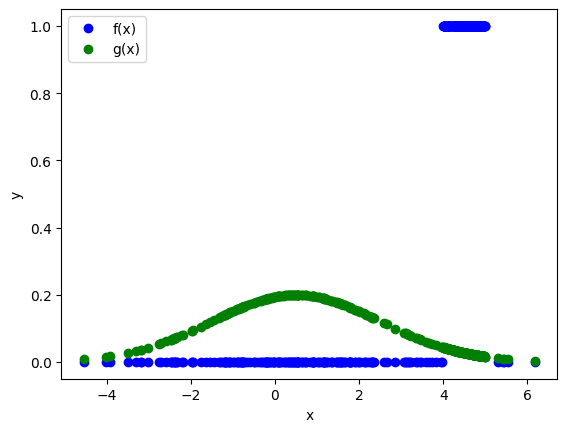

In [205]:
x1 = uniform_distribution(count, a, b)
x2 = normal_distribution(count, sigma, m)

x1_points = []
for value in x1:
    x1_points.append(Point(value, 1))
x1_points = np.array(x1_points)

x2_points = []
for value in x2:
    x2_points.append(Point(value, 2))
x2_points = np.array(x2_points)

x_points = np.concatenate([x1_points, x2_points])

arr_list = x_points.tolist()
random.shuffle(arr_list)
x_points = np.array(arr_list)

for el in x_points:
    print(el)

y1 = np.array([func1(element.value) for element in x_points])
y2 = np.array([func2(element.value) for element in x_points])

# y3 = np.array([func1(value) if func1(value) > func2(value) else func2(value) for value in x])

x = [element.value for element in x_points]
fig, ax = plt.subplots()
ax.plot(x, y1, "bo", label='f(x)')
ax.plot(x, y2, "go", label='g(x)')
# ax.plot(x, y3, "ro", label='g(x)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

## Ошибка

In [206]:
p_error = p1 * (quad(func1, -np.inf, a)[0] + quad(func1, b, np.inf)[0]) + p2 * quad(func2, a, b)[0]
p_error

0.013917342104386195

In [207]:
count_errors = 0
for element in x_points:
    f1_value = func1(element.value)
    f2_value = func2(element.value)

    if f1_value >= f2_value and element.class_number != 1:
        count_errors += 1
    elif f1_value < f2_value and element.class_number != 2:
        count_errors += 1

print(count_errors)

print(count_errors / 400)



7
0.0175
